In [1]:
# import section -- Must run this cell before anything
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline

### <center> Simple Linear Regression
---
<center>Predicting pizza price example

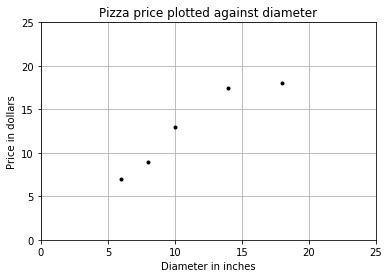

In [2]:
# Creating the data
# A convention is to name the matrix of feature X and to name the output vector y.
# Uppercase letters indicate matrices, and lowercase letters indicate vectors.
X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)  # vector representing the size of the pizzas(diameter).
y = np.array([7, 9, 13, 17.5, 18])  # vector representing the prices of the pizzas.

# plotting the data
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

1.965517241379315
[0.9762931]


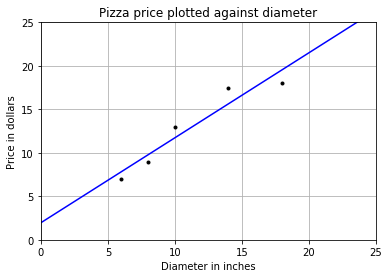

A 12" pizza should cost: $13.68


In [32]:
# Ordinary Least Squares(OLS) Linear Regression
model = LinearRegression() # Create an instance of the estimator. 
model.fit(X, y) # Fit the model on the training data.
print(model.intercept_) # shows where the line intercept with y axis.
print(model.coef_) # shows the coefficents of the equation. In this case, it will shows ony the slope.

new_X = np.arange(-1,30).reshape(-1,1)
prediction = model.predict(new_X) # creates an array with the predicted outputs.
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.') # plots the original data
plt.plot(new_X, prediction, 'b')# plots the prediction line
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

# Predict the price of a pizza with a diameter that has never been seen before.
test_pizza = np.array([[12]]) 
predicted_price = model.predict(test_pizza)
print('A 12" pizza should cost: $%.2f' % predicted_price)

Note: Simple linear regression assumes that a linear relationship exists between the response variable (y - "output") and the
explanatory variable (X - "features").

---

## <center> Evaluating the fitness of the model with a cost function
In this example we only used a training set. The differences between the values predicted by the model and the ones observed in the training set are called $\textbf{residuals}$ or $\textbf{training error}$. These differences in the test set are called $\textbf{prediction errors}$ or $\textbf{test errors}$.
The best set of parameters for our model is the that minimizes this residuals errors. There are some ways to measure this, but the most common is the Mean Square Error (MSE):<br>
    <center> $MSE =\frac{1}{n}\sum_{i=1}^{n}(y^{(i)} - h_{\theta}(x^{(i)}))^{2}$ <br>
        $\textbf{where:}$<br>
        $\textbf{n}$ = Number of examples<br>
        $\mathbf{h_{\theta}(x^{(i)})}$ = prediction of the i$^{th}$ example<br>
        
This function represents cost function, the one we want to minimize. The cost function is often represented as:<br><br>
<center>$J(\theta) = \frac{1}{n}\sum_{i=1}^{n}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$
    
Obs: This representation of the cost function is the one used in the [machine learning](https://www.coursera.org/learn/machine-learning/) course from Coursera.

In [4]:
# print the residuals
print('MSE: %.2f' % np.mean((model.predict(X) - y) ** 2))

# using the scikit-learn MSE implementation
print('Mean squared error(sklearn): %.2f' % mean_squared_error(y, model.predict(X)))


MSE: 1.75
Mean squared error(sklearn): 1.75


## <center> Solving OLS for Linear Regression
Simple linear regression is given by the equation: $y=\alpha + \beta X$ and its goal is to solve for the values of $\beta$ and $\alpha$ to minimize the cost function.
we start solving for $\beta$.
    <center> $\beta = \frac{cov(x,y)}{var(x)}$ <br><br> $\textbf{where:}$<br><br> $cov(x,y)$ is the covariance of x and y;<br>
        $var(x)$ is the variance of x;
- Covariance is a measure of how much two variables change together. The covariance is positive if the two variable increase\decrease together. However, if while one variable increases while  the other decreases, the covariance is negative. If there is no linear relationship between the two variables, their covariance will be equal to zero; they are linearly uncorrelated but not necessarily independent. Covariance can be calculated using the following formula: 
<center>$cov(x,y) = \frac{\sum_{i=1}^{n} (x^{(i)}-\bar{x})(y^{(i)}-\bar{y})}{n-1}$<br><br> $\textbf{where:}$<br><br>
    $\bar{x}$ is the mean of the values of x and $\bar{y}$ is the mean of the values of y. 

In [24]:
#calculating the covariance

#find the means of y and X
x_bar = X.mean()
y_bar = y.mean()

# we transpose X because both operands must be row vectors
# X.shape[0] and X.size are interchangeable for this purpose 
covariance = np.multiply((X - x_bar).transpose(), y - y_bar).sum() /(X.size - 1)

# using the NumPy method
cov_numpy = np.cov(X.T,y) 
print("Covariance implementation:")
print(covariance)
print("NumPy covariance method:")
print(cov_numpy)
# The numpy method returns the covariance matrix, but we can see in the matrix that the values showing the covariance 
# between X and y (element row=1 and column=0, and element row=0 and column=1) matches the one previously calculated

Covariance implementation:
22.65
NumPy covariance method:
[[23.2  22.65]
 [22.65 24.3 ]]


- Variance is is a measure of how far a set of values are spread out. If all the numbers in the set are equal, the variance of the set is zero. A small variance indicates that the numbers are near the mean of the set, while a set containing numbers that are far from the mean and from each other will have a large variance. 
Variance can be calculated using the following equation:
<center>$var(x) = \frac{\sum_{i=1}^{n}(x^{(i)}-\bar{x})^{2}}{n-1}$
    

In [29]:
# Calculating the variance

# Note that we subtract one from the number of training instances when calculating the sample variance.
# This technique is called Bessel's correction. It corrects the bias in the estimation of the population variance
# from a sample.
variance = ((X - x_bar)**2).sum() / (X.shape[0] - 1)

#using numpy method
# we use ddof = 1 to use the Bessel's correction in the numpy method
var_numpy = np.var(X, ddof=1)

print("Variance implementation: {} vs Numpy var method: {}".format(variance, var_numpy))

Variance implementation: 23.2 vs Numpy var method: 23.2


***
Solving $\beta$  (slope)

***

In [36]:
beta = covariance/variance
print("beta:%.2f" % beta)

beta:0.98


***
With the value of $\beta$, now we can solve $\alpha$ (intercept) in the equation $\alpha = \bar{y} - \bar{x} \beta$.<br> ($\bar{x},\bar{y}$) are the coordinates of the centroid, a point that the
model must pass through.

In [39]:
alpha = y_bar - beta*x_bar
print("alpha:%.2f" % alpha)

alpha:1.97


## <center> Evaluating the Model
    
There are several metrics that can be used to evaluated the performance of the this linear regression model. We are going to use **R-Squared** or **coefficient of determination**. R-Squared measures how close the data are from the regression line. There are several methods for calculating R-squared. In the case of simple linear regression, R-squared is equal to the square of the **Pearson product-moment correlation coefficient (PPMCC)**, or **Pearson's r**. Using this method, R-squared must
be a positive number between zero and one.

> Limitations:
R-squared in particular is sensitive to outliers, and can spuriously increase when features are added to the model

<center> $R^{2} =1 - \frac{SS_{tot}}{SS_{res}}$<br>
    $\textbf{Where:}$<br><br>
    $R^{2}$ = R-Squared or coeff. of determination<br>
    $SS_{tot}$ = Total Sum of Squares (TSS) - it tells you how much variation there is in the dependent variable.<br><br>
    <center>$SS_{tot}=\sum_{i=1}^{n}(y^{(i)}-\bar{y})^{2}$<br><br>
    $SS_{res}$ = Residual Sum of Squares(RSS) - it tells you how much of the dependent variable’s variation your model $\textbf{did not explain}$.<br><br>
    <center>$SS_{res}=\sum_{i=1}^{n}(y^{(i)}-h_{\theta}(x^{(i)}))^{2}$



In [66]:
# First let divide our data into train and test data 
# training data(it is the one we already used to trained the model)
X_train = X
y_train = y

# test data
X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
TSS = np.sum((y_test-y_test.mean())**2)
RSS = np.sum((y_test-y_predict)**2)
R2 = 1-(RSS/TSS)

# using the sklearn method
r_squared = model.score(X_test, y_test)
print("R2: %0.3f and r_squared: %0.3f"% (R2, r_squared))

R2: 0.662 and r_squared: 0.662


## Now let's try this in a real model 